In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Load file in data frame

In [92]:
df=pd.read_csv("loan.csv")
df.head()

C:\Users\munishgu\AppData\Local\Temp\ipykernel_27444\2216854462.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("loan.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [94]:
print(df.shape)

(39717, 111)


In [95]:
#Check the datatypes of all the columns of the dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


In [96]:
#Check the number of null values in the columns
df.isnull().sum().sort_values(ascending=False)

verification_status_joint    39717
annual_inc_joint             39717
mo_sin_old_rev_tl_op         39717
mo_sin_old_il_acct           39717
bc_util                      39717
                             ...  
delinq_amnt                      0
policy_code                      0
earliest_cr_line                 0
delinq_2yrs                      0
id                               0
Length: 111, dtype: int64

Drop columns with null values

In [97]:
#there are lot of columns with null value, we have to drop them
df.shape
df.dropna(axis=1, how='all',inplace = True)
df.isnull().all(axis = 1).sum()


#df.groupby("loan_status").count()


0

In [98]:
df.shape

(39717, 57)

In [99]:
print(df.head())

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... next_pymnt_d last_credit_pull_d  \
0   10.65%       162.87     B        B2  ...          NaN             May-16   
1   15.27%        59.83     C        C4  ...          NaN             Sep-13   
2   15.96%        84.33     C        C5  ...          NaN             May-16   
3   13.49%       339.31     C        C1  ...          NaN             Apr-16   
4   12.69%        67.79     B        B5  ...       Jun-16             May-16   

  collections_12_mths_ex_med  policy_code applicat

Check columns having single value and remove them

In [100]:
slist = []
for x in df.columns:
    unique_val = df[x].nunique()
    if(unique_val == 1):
        slist.append(x)
print(slist)
# Remove those columns
df.drop(slist, axis = 1, inplace = True)

['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


In [101]:
print(df.shape)

(39717, 48)


In [102]:
#check count of loan status
df.loan_status.unique()



array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [103]:
df.groupby("loan_status").count()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
loan_status,,,,,,,,,,,,,,,,,,,,,
Charged Off,5627,5627,5627,5627,5627,5627,5627,5627,5627,5627,...,5627,5627,5627,5627,5627,5556,5627,0,5626,5509
Current,1140,1140,1140,1140,1140,1140,1140,1140,1140,1140,...,1140,1140,1140,1140,1140,1140,1140,1140,1140,1140
Fully Paid,32950,32950,32950,32950,32950,32950,32950,32950,32950,32950,...,32950,32950,32950,32950,32950,32950,32950,0,32949,32371


Remove loans which are ongoing as they cannot provide any insights

In [104]:
#remove current loans
df = df[df.loan_status != "Current"]
df.groupby("loan_status").count()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
loan_status,,,,,,,,,,,,,,,,,,,,,
Charged Off,5627,5627,5627,5627,5627,5627,5627,5627,5627,5627,...,5627,5627,5627,5627,5627,5556,5627,0,5626,5509
Fully Paid,32950,32950,32950,32950,32950,32950,32950,32950,32950,32950,...,32950,32950,32950,32950,32950,32950,32950,0,32949,32371


Checking Duplicates records

In [105]:
df[df.duplicated()]


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies


Check data type of each column

In [106]:
df.dtypes

id                           int64
member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
url                         object
desc                        object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
mths_since_last_delinq     float64
mths_since_last_reco

Correct the data types of columns which have numerical value

In [107]:
convert_dict ={
    'dti': 'float',
    'funded_amnt' : 'float',
    'funded_amnt_inv' : 'float',
    'loan_amnt' : 'float'
}
df = df.astype(convert_dict)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       38577 non-null  int64  
 1   member_id                38577 non-null  int64  
 2   loan_amnt                38577 non-null  float64
 3   funded_amnt              38577 non-null  float64
 4   funded_amnt_inv          38577 non-null  float64
 5   term                     38577 non-null  object 
 6   int_rate                 38577 non-null  object 
 7   installment              38577 non-null  float64
 8   grade                    38577 non-null  object 
 9   sub_grade                38577 non-null  object 
 10  emp_title                36191 non-null  object 
 11  emp_length               37544 non-null  object 
 12  home_ownership           38577 non-null  object 
 13  annual_inc               38577 non-null  float64
 14  verification_status      38

Sort and reindex data set

In [109]:
df = df.reindex(sorted(df.columns), axis=1)
df.head(1)

,addr_state,annual_inc,collection_recovery_fee,delinq_2yrs,desc,dti,earliest_cr_line,emp_length,emp_title,funded_amnt,...,title,total_acc,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,url,verification_status,zip_code
0,AZ,24000.0,0.0,0,Borrower added on 12/22/11 > I need to upgra...,27.65,Jan-85,10+ years,NaN,5000.0,...,Computer,9,5863.155187,5833.84,863.16,0.0,5000.0,https://lendingclub.com/browse/loanDetail.acti...,Verified,860xx


Removing columns which are irrelvant for analysis of loan defaulting

In [110]:
df.drop( ["collection_recovery_fee","desc","delinq_2yrs","emp_title","id","last_credit_pull_d","last_pymnt_amnt","last_pymnt_d","member_id","mths_since_last_delinq","mths_since_last_record", "next_pymnt_d" , "out_prncp","out_prncp_inv", "recoveries", "revol_bal", "title", "total_pymnt","total_pymnt_inv", "total_rec_int", "total_rec_late_fee", "total_rec_prncp", "url", "zip_code" ], axis = 1, inplace = True)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addr_state            38577 non-null  object 
 1   annual_inc            38577 non-null  float64
 2   dti                   38577 non-null  float64
 3   earliest_cr_line      38577 non-null  object 
 4   emp_length            37544 non-null  object 
 5   funded_amnt           38577 non-null  float64
 6   funded_amnt_inv       38577 non-null  float64
 7   grade                 38577 non-null  object 
 8   home_ownership        38577 non-null  object 
 9   inq_last_6mths        38577 non-null  int64  
 10  installment           38577 non-null  float64
 11  int_rate              38577 non-null  object 
 12  issue_d               38577 non-null  object 
 13  loan_amnt             38577 non-null  float64
 14  loan_status           38577 non-null  object 
 15  open_acc              38

Removing column public record bankruptcies as it contains only 0 and 1 value which looks irrelavant for analysis

In [112]:
df.drop(["pub_rec_bankruptcies"],axis = 1, inplace = True)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   addr_state           38577 non-null  object 
 1   annual_inc           38577 non-null  float64
 2   dti                  38577 non-null  float64
 3   earliest_cr_line     38577 non-null  object 
 4   emp_length           37544 non-null  object 
 5   funded_amnt          38577 non-null  float64
 6   funded_amnt_inv      38577 non-null  float64
 7   grade                38577 non-null  object 
 8   home_ownership       38577 non-null  object 
 9   inq_last_6mths       38577 non-null  int64  
 10  installment          38577 non-null  float64
 11  int_rate             38577 non-null  object 
 12  issue_d              38577 non-null  object 
 13  loan_amnt            38577 non-null  float64
 14  loan_status          38577 non-null  object 
 15  open_acc             38577 non-null  int6

Two columns emp_length and revol_util has some missing values

Considering employment length mode value for missing values since most of the people are opting for a 10+ years loan 

In [114]:
print("Mode : " + df.emp_length.mode()[0])
df.emp_length.value_counts()

Mode : 10+ years


emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

Looking at this data we can assign mode to null values

In [115]:
df.emp_length.fillna(df.emp_length.mode()[0], inplace = True)
df.emp_length.isna().sum()

C:\Users\munishgu\AppData\Local\Temp\ipykernel_27444\402250431.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.emp_length.fillna(df.emp_length.mode()[0], inplace = True)


0

The % of missing values in revol_util very less,so we can remove the rows that are missing those values

In [116]:
df.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
df.revol_util.isna().sum()

0

In [117]:
print(df.head())

  addr_state  annual_inc    dti earliest_cr_line emp_length  funded_amnt  \
0         AZ     24000.0  27.65           Jan-85  10+ years       5000.0   
1         GA     30000.0   1.00           Apr-99   < 1 year       2500.0   
2         IL     12252.0   8.72           Nov-01  10+ years       2400.0   
3         CA     49200.0  20.00           Feb-96  10+ years      10000.0   
5         AZ     36000.0  11.20           Nov-04    3 years       5000.0   

   funded_amnt_inv grade home_ownership  inq_last_6mths  ...  loan_amnt  \
0           4975.0     B           RENT               1  ...     5000.0   
1           2500.0     C           RENT               5  ...     2500.0   
2           2400.0     C           RENT               2  ...     2400.0   
3          10000.0     C           RENT               1  ...    10000.0   
5           5000.0     A           RENT               3  ...     5000.0   

   loan_status open_acc  pub_rec         purpose  revol_util  sub_grade  \
0   Fully Paid   

Standardizing data by removing % from int_rate ,revol_util

In [118]:
df.revol_util = df.revol_util.apply(lambda x : float(x.replace('%','')))

In [119]:
df.int_rate = df.int_rate.apply(lambda x : float(x.replace('%','')))

"emp_length" --> { (< 1 year) is assumed as 0 and 10+ years is assumed as 10 }

In [120]:
df.emp_length = pd.to_numeric(df.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

In [121]:
df.head()

,addr_state,annual_inc,dti,earliest_cr_line,emp_length,funded_amnt,funded_amnt_inv,grade,home_ownership,inq_last_6mths,...,loan_amnt,loan_status,open_acc,pub_rec,purpose,revol_util,sub_grade,term,total_acc,verification_status
0,AZ,24000.0,27.65,Jan-85,10,5000.0,4975.0,B,RENT,1,...,5000.0,Fully Paid,3,0,credit_card,83.7,B2,36 months,9,Verified
1,GA,30000.0,1.00,Apr-99,0,2500.0,2500.0,C,RENT,5,...,2500.0,Charged Off,3,0,car,9.4,C4,60 months,4,Source Verified
2,IL,12252.0,8.72,Nov-01,10,2400.0,2400.0,C,RENT,2,...,2400.0,Fully Paid,2,0,small_business,98.5,C5,36 months,10,Not Verified
3,CA,49200.0,20.00,Feb-96,10,10000.0,10000.0,C,RENT,1,...,10000.0,Fully Paid,10,0,other,21.0,C1,36 months,37,Source Verified
5,AZ,36000.0,11.20,Nov-04,3,5000.0,5000.0,A,RENT,3,...,5000.0,Fully Paid,9,0,wedding,28.3,A4,36 months,12,Source Verified


In [122]:
df.home_ownership.value_counts()

home_ownership
RENT        18448
MORTGAGE    17010
OWN          2970
OTHER          96
NONE            3
Name: count, dtype: int64

In [123]:
#As only 3 no,so replacing 'NONE' with 'OTHERS'
df['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

C:\Users\munishgu\AppData\Local\Temp\ipykernel_27444\1089095133.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)


In [124]:
df.home_ownership.value_counts()

home_ownership
RENT        18448
MORTGAGE    17010
OWN          2970
OTHER          99
Name: count, dtype: int64

In [125]:
df.verification_status.value_counts()

verification_status
Not Verified       16665
Verified           12196
Source Verified     9666
Name: count, dtype: int64

__Removing Outliers__

Annual income

<Axes: ylabel='annual_inc'>

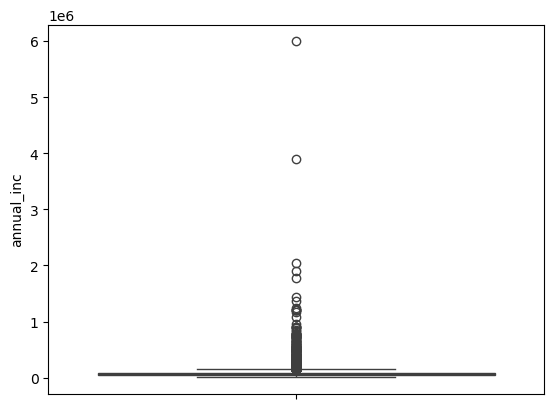

In [126]:
sns.boxplot(df['annual_inc'])

In [127]:
Q1=np.percentile(df["annual_inc"],25)
Q3=np.percentile(df["annual_inc"],75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

In [128]:
df = df[(df.annual_inc>=lower_bound) & (df.annual_inc <= upper_bound)]

<Axes: ylabel='annual_inc'>

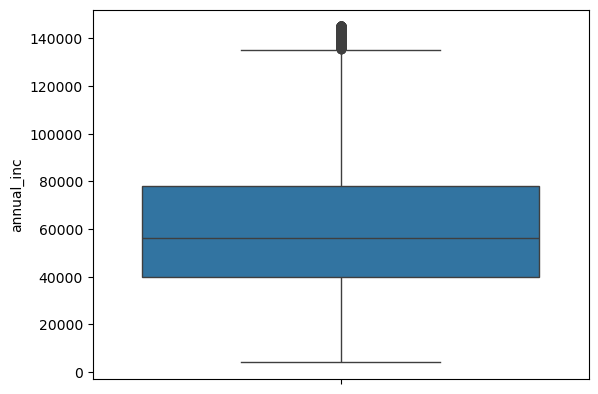

In [129]:
sns.boxplot(df['annual_inc'])

Loan amount, Funded amount

<Axes: >

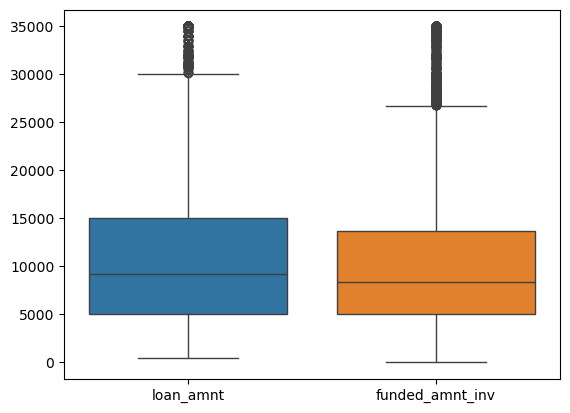

In [130]:
sns.boxplot(df[["loan_amnt","funded_amnt_inv"]])

Installments

<Axes: ylabel='installment'>

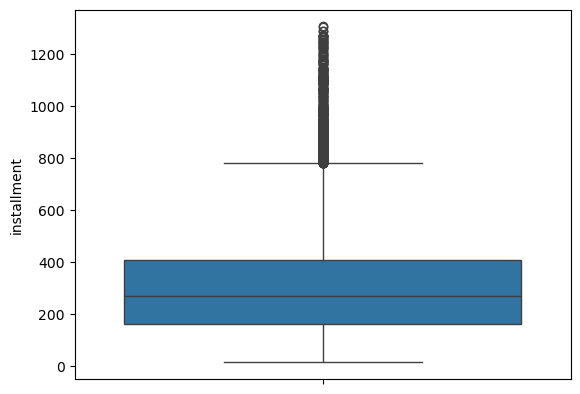

In [131]:
sns.boxplot(df["installment"])

Interest rate,DTI

<Axes: >

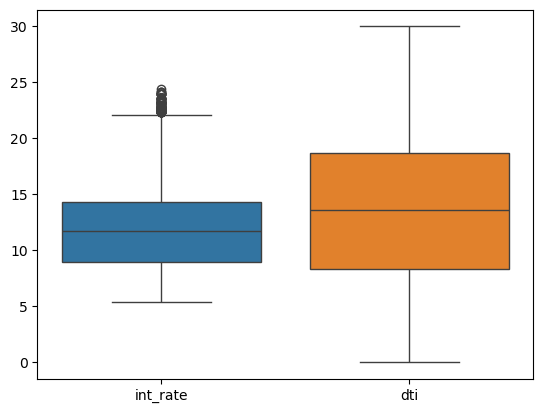

In [132]:
sns.boxplot(df[["int_rate","dti"]])

The distribution is continous and so no need to remove outliers / extreme values for these above columns

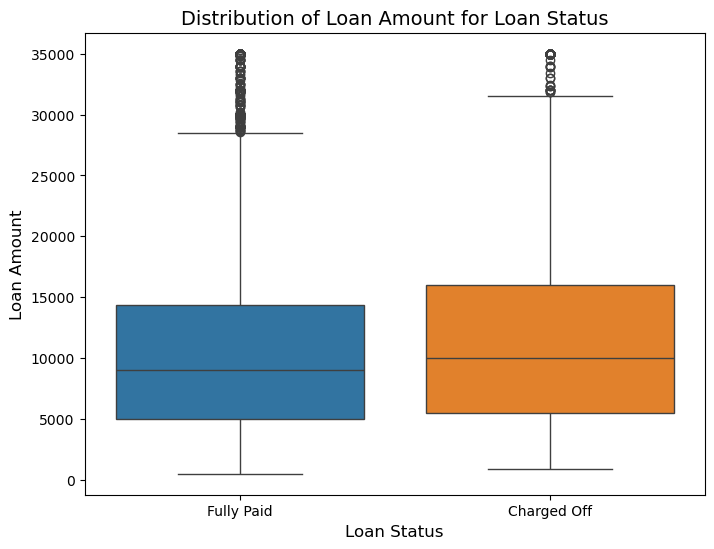

In [133]:
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(data=df,y="loan_amnt",x="loan_status",hue="loan_status")
plt.title("Distribution of Loan Amount for Loan Status", fontsize=14)
plt.xlabel("Loan Status", fontsize=12)
plt.ylabel("Loan Amount", fontsize=12)
plt.show()

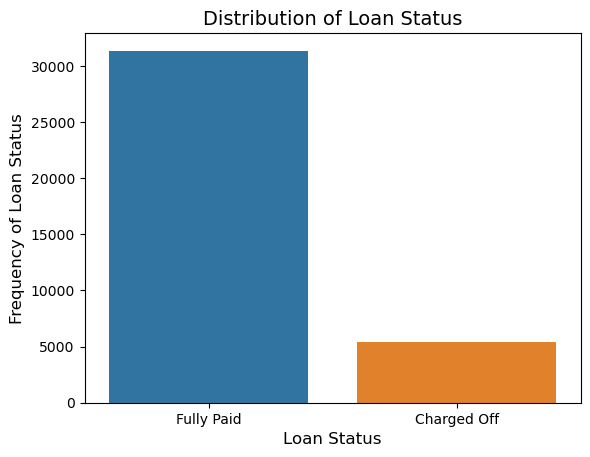

In [134]:
sns.countplot(data=df,x="loan_status",hue="loan_status")
plt.title("Distribution of Loan Status", fontsize=14)
plt.xlabel("Loan Status", fontsize=12)
plt.ylabel("Frequency of Loan Status", fontsize=12)
plt.show()

__Derived Columns__

In [135]:
df['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

Convert loan date (issue_d) to DateTime (format: yyyy-mm-dd)

In [136]:
# Converting the column issue_d from string to DateTime
df['issue_d'] = pd.to_datetime(df['issue_d'], format = '%b-%y')

In [137]:
# Extracting Month and Year for analysis from issue_d
df['issue_m'] = pd.DatetimeIndex(df['issue_d']).month
df['issue_y'] = pd.DatetimeIndex(df['issue_d']).year

# __Univariate Analysis__

1. Ordered categorical data
    1. Sub grade (sub_grade)
    2. Grade (grade)
    3. Term (36 / 60 months) (term)
    4. Employment length (emp_length)
    5. Issue year (issue_y)
    6. Issue month (issue_m)

As we already have grade column, extracting only subgrade (int level value) from the sub_grade variable

In [138]:
df.sub_grade = df.sub_grade.apply(lambda x : int(x[-1]))

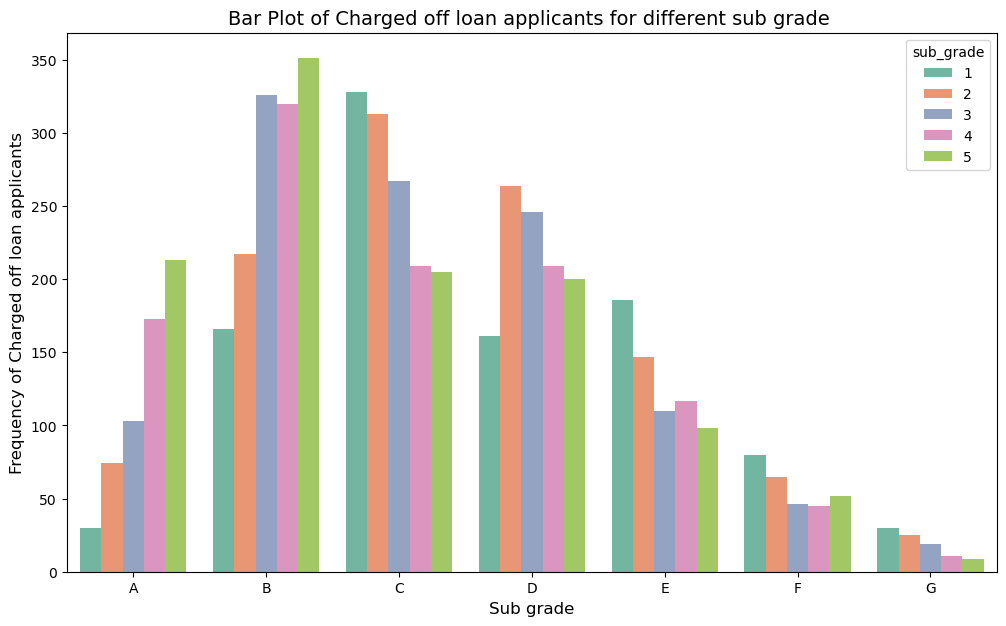

In [139]:
fig, ax = plt.subplots(figsize=(12,7))
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = df[df.loan_status == 'Charged Off'],palette="Set2")
plt.title("Bar Plot of Charged off loan applicants for different sub grade ", fontsize=14)
plt.xlabel("Sub grade", fontsize=12)
plt.ylabel("Frequency of Charged off loan applicants", fontsize=12)
plt.show()

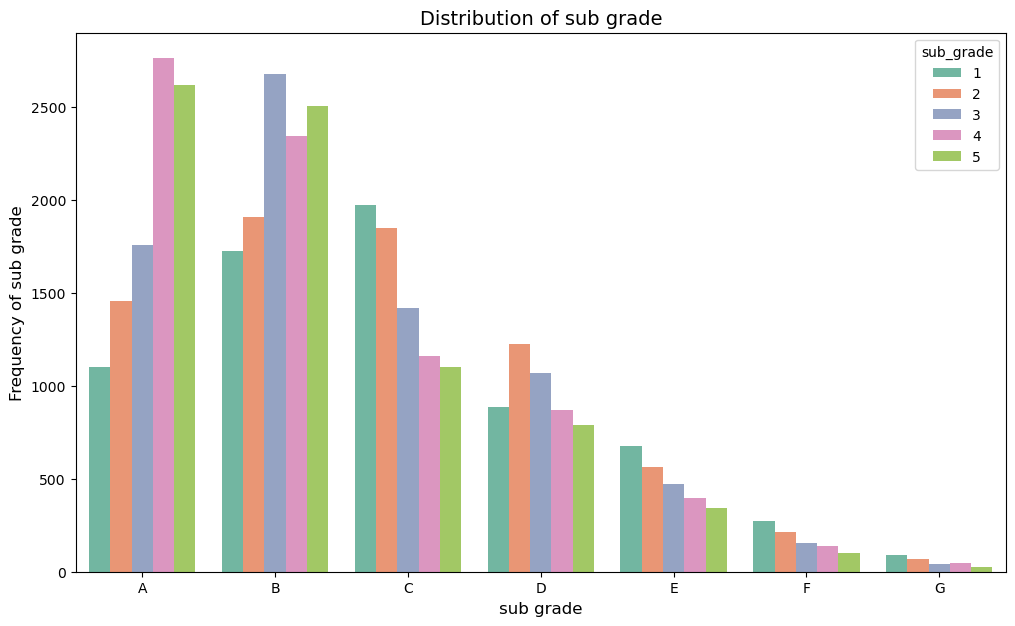

In [140]:
fig, ax = plt.subplots(figsize=(12,7))
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = df,palette="Set2")
plt.title("Distribution of sub grade", fontsize=14)
plt.xlabel("sub grade", fontsize=12)
plt.ylabel("Frequency of sub grade", fontsize=12)
plt.show()

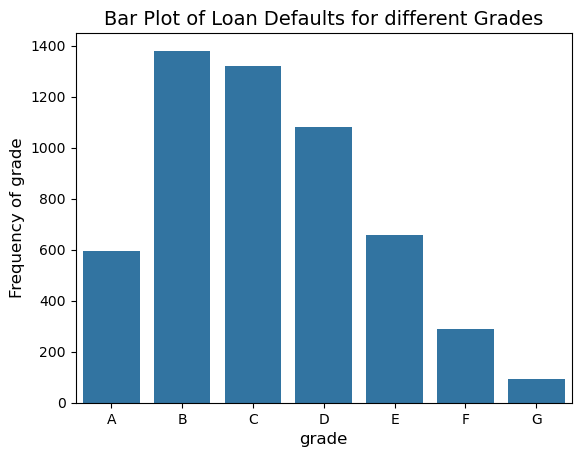

In [141]:
sns.countplot(x = 'grade', data = df[df.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.title("Bar Plot of Loan Defaults for different Grades", fontsize=14)
plt.xlabel("grade", fontsize=12)
plt.ylabel("Frequency of grade", fontsize=12)
plt.show()

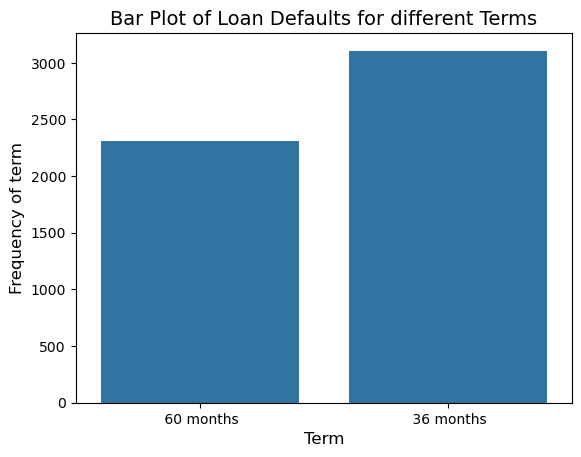

In [142]:
for p in ax.patches:
            ax.annotate(format(int(p.get_height()),'.0f'), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom',
            xytext=(0,5),textcoords='offset points')   
ax=sns.countplot(x = 'term', data = df[df.loan_status == 'Charged Off'])
plt.title("Bar Plot of Loan Defaults for different Terms", fontsize=14)
plt.xlabel("Term", fontsize=12)
plt.ylabel("Frequency of term", fontsize=12)
plt.show()

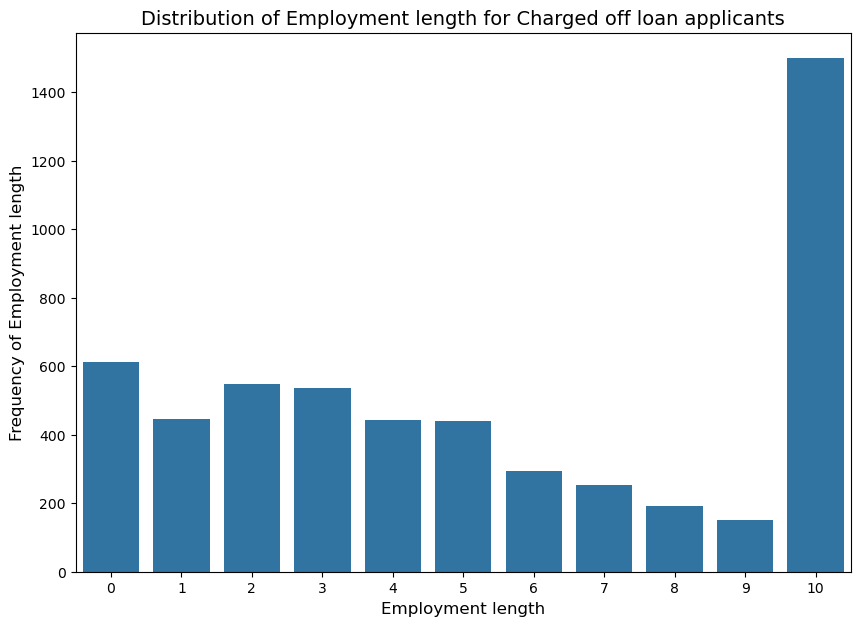

In [143]:
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(x = 'emp_length', data = df[df.loan_status == 'Charged Off'])
plt.title("Distribution of Employment length for Charged off loan applicants", fontsize=14)
plt.xlabel("Employment length", fontsize=12)
plt.ylabel("Frequency of Employment length", fontsize=12)
plt.show()

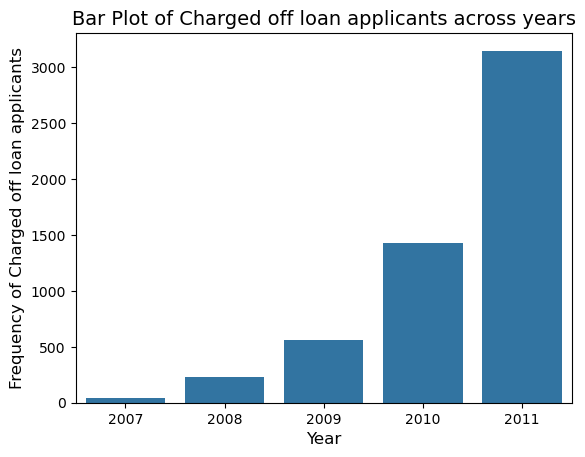

In [144]:
sns.countplot(x = 'issue_y', data = df[df.loan_status == 'Charged Off'])
plt.title("Bar Plot of Charged off loan applicants across years", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Frequency of Charged off loan applicants", fontsize=12)
plt.show()

__Inferences drawn from Plotted graphs for Grades,SubGrades,Term,Employment length and Year__

Grades B,C,D  had the highest number of "Charged off" loan applicants, indicating that applicants with this credit grade faced challenges in repaying their loans.

Borrowers from sub grade B3, B4 and B5 have maximum tendency to default.

Short-term loans with a duration of 36 months were more likely to Loan Default. This suggests that a significant portion of applicants who experienced loan default chose shorter repayment terms.

Applicants who had been employed for more than 10 years accounted for the highest number of "Charged off" loans. This indicates that long-term employment history did not necessarily guarantee successful loan repayment.

The high number of loan defaults in 2011 could be due to some financial crisis 



2. Unordered categorical data
    1. Address State (addr_state)
    2. Loan purpose (purpose)
    3. Home Ownership (home_ownership)

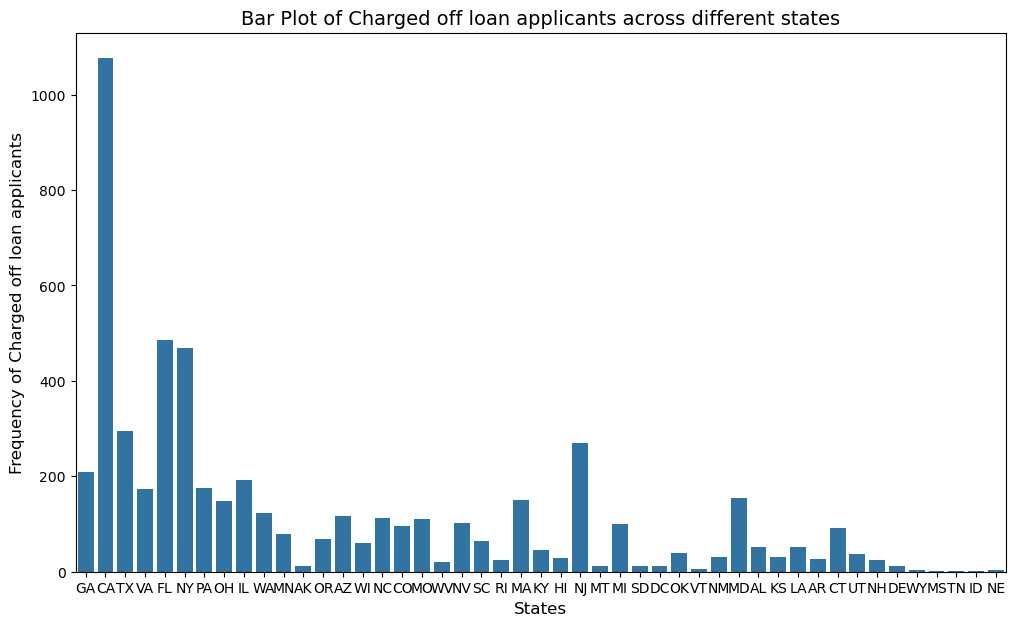

In [145]:
fig, ax = plt.subplots(figsize=(12,7))
sns.countplot(x='addr_state', data=df[df['loan_status']=='Charged Off'])
plt.title("Bar Plot of Charged off loan applicants across different states", fontsize=14)
plt.xlabel("States", fontsize=12)
plt.ylabel("Frequency of Charged off loan applicants", fontsize=12)
plt.show()

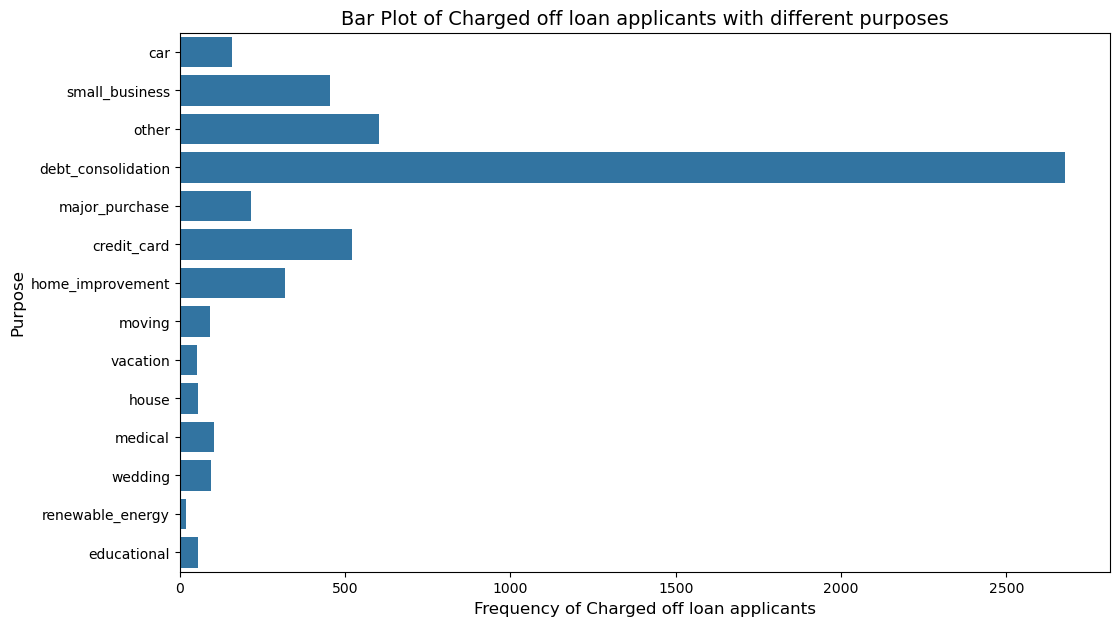

In [146]:
fifig, ax = plt.subplots(figsize = (12,7))
sns.countplot(y ='purpose', data=df[df.loan_status == 'Charged Off'])
plt.title("Bar Plot of Charged off loan applicants with different purposes", fontsize=14)
plt.xlabel("Frequency of Charged off loan applicants", fontsize=12)
plt.ylabel("Purpose", fontsize=12)
plt.show()
#plt.xticks(rotation=50)

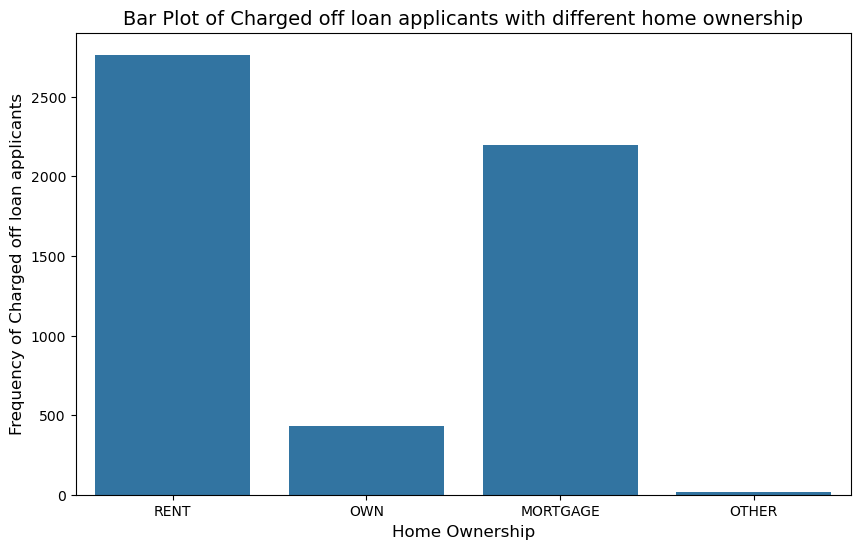

In [147]:
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(x='home_ownership', data=df[df['loan_status']=='Charged Off'])
plt.title("Bar Plot of Charged off loan applicants with different home ownership", fontsize=14)
plt.xlabel("Home Ownership", fontsize=12)
plt.ylabel("Frequency of Charged off loan applicants", fontsize=12)
plt.show()

__Inferences drawn from Plotted graphs for Grades,SubGrades,Term,Employment length and Year__

1.Borrowers from states CA, FL, NJ have maximum tendency to default the loan.

2.Debt consolidation was the primary loan purpose for most "Charged off" loan applicant

3.The majority of "Charged off" loan participants lived in rented houses or mortgage.

 __Quantitative variables__
   
1. Interest rate bucket (int_rate_groups)
2. Annual income bucket (annual_inc_groups)
3. Loan amount bucket (loan_amnt_groups)
4. Funded amount bucket (funded_amnt_groups)

In [148]:
#creating bins for int_rate,open_acc,revol_util,total_acc
df['int_rate_groups'] = pd.cut(df['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
df['annual_inc_groups'] = pd.cut(df['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])
df['loan_amnt_groups'] = pd.cut(df['loan_amnt'], bins=4,precision =0,labels =['0-5k','5k-10k','10k-15k','15k-above'])
df['funded_amnt_groups'] = pd.cut(df['funded_amnt'], bins=4,precision =0,labels =['0-5k','5k-10k','10k-15k','15k-above'])
df['dti_groups'] = pd.cut(df['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

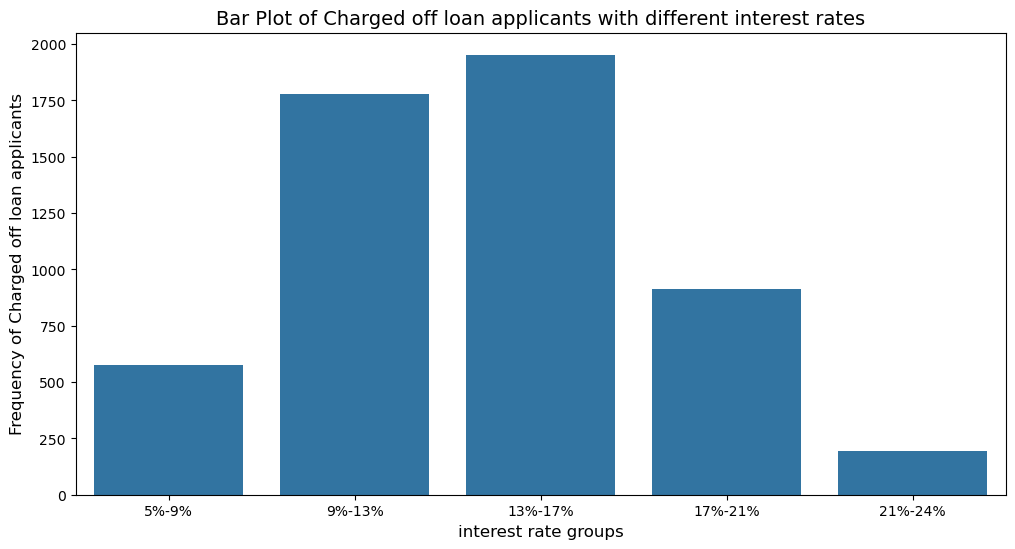

In [149]:
fig, ax = plt.subplots(figsize = (12,6))
sns.countplot(x='int_rate_groups', data=df[df.loan_status == 'Charged Off'])
plt.title("Bar Plot of Charged off loan applicants with different interest rates", fontsize=14)
plt.xlabel("interest rate groups", fontsize=12)
plt.ylabel("Frequency of Charged off loan applicants", fontsize=12)
plt.show()

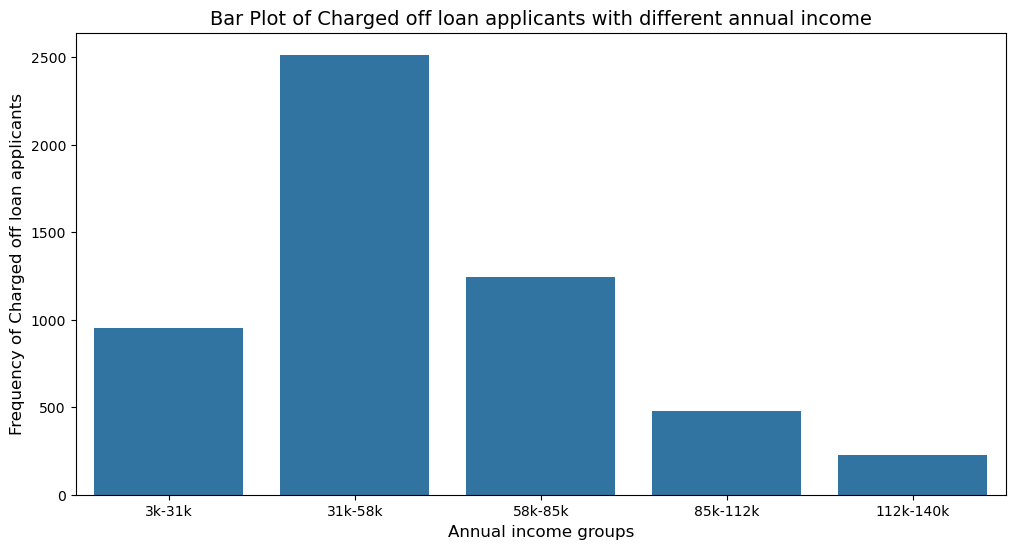

In [150]:
fig, ax = plt.subplots(figsize = (12,6))
sns.countplot(x='annual_inc_groups', data=df[df.loan_status == 'Charged Off'])
plt.title("Bar Plot of Charged off loan applicants with different annual income", fontsize=14)
plt.xlabel("Annual income groups", fontsize=12)
plt.ylabel("Frequency of Charged off loan applicants", fontsize=12)
plt.show()

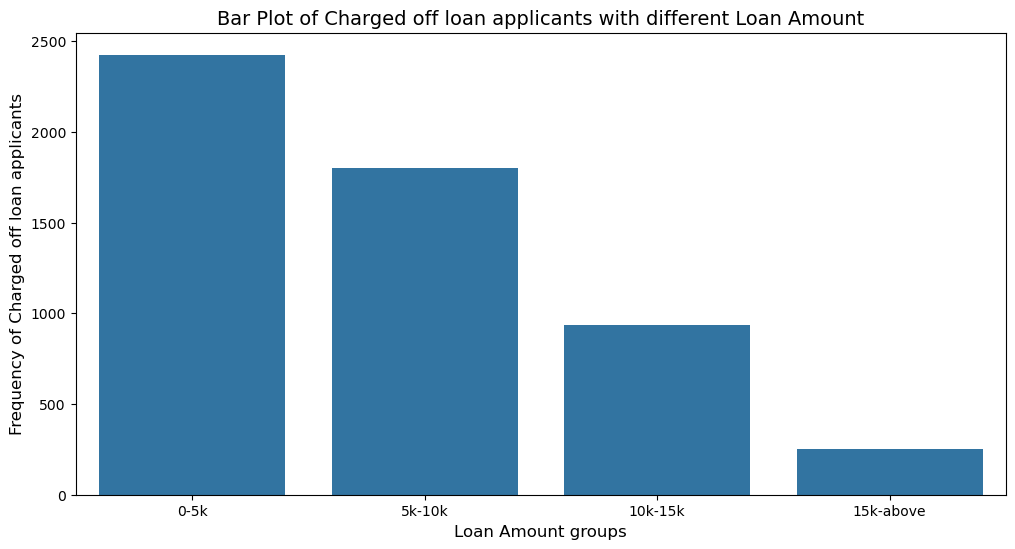

In [151]:
fig, ax = plt.subplots(figsize = (12,6))
sns.countplot(x='loan_amnt_groups', data=df[df.loan_status == 'Charged Off'])
plt.title("Bar Plot of Charged off loan applicants with different Loan Amount", fontsize=14)
plt.xlabel("Loan Amount groups", fontsize=12)
plt.ylabel("Frequency of Charged off loan applicants", fontsize=12)
plt.show()

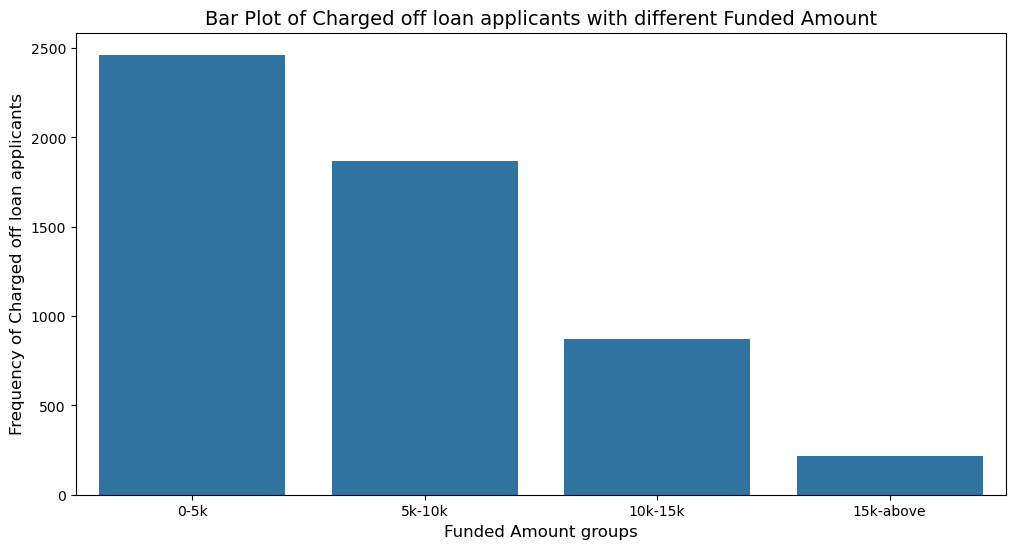

In [152]:
fig, ax = plt.subplots(figsize = (12,6))
sns.countplot(x='funded_amnt_groups', data=df[df.loan_status == 'Charged Off'])
plt.title("Bar Plot of Charged off loan applicants with different Funded Amount", fontsize=14)
plt.xlabel("Funded Amount groups", fontsize=12)
plt.ylabel("Frequency of Charged off loan applicants", fontsize=12)
plt.show()

DTI(Debt to income rate)

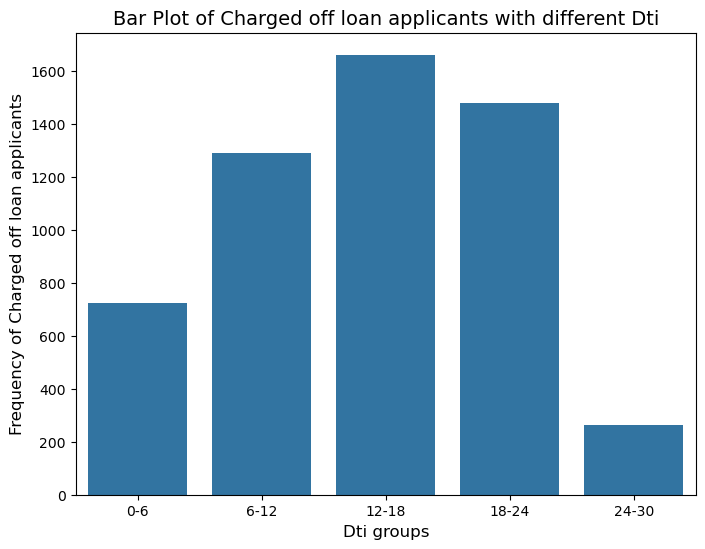

In [153]:
fig, ax = plt.subplots(figsize = (8,6))
sns.countplot(x='dti_groups', data=df[df.loan_status == 'Charged Off'])
plt.title("Bar Plot of Charged off loan applicants with different Dti", fontsize=14)
plt.xlabel("Dti groups", fontsize=12)
plt.ylabel("Frequency of Charged off loan applicants", fontsize=12)
plt.show()

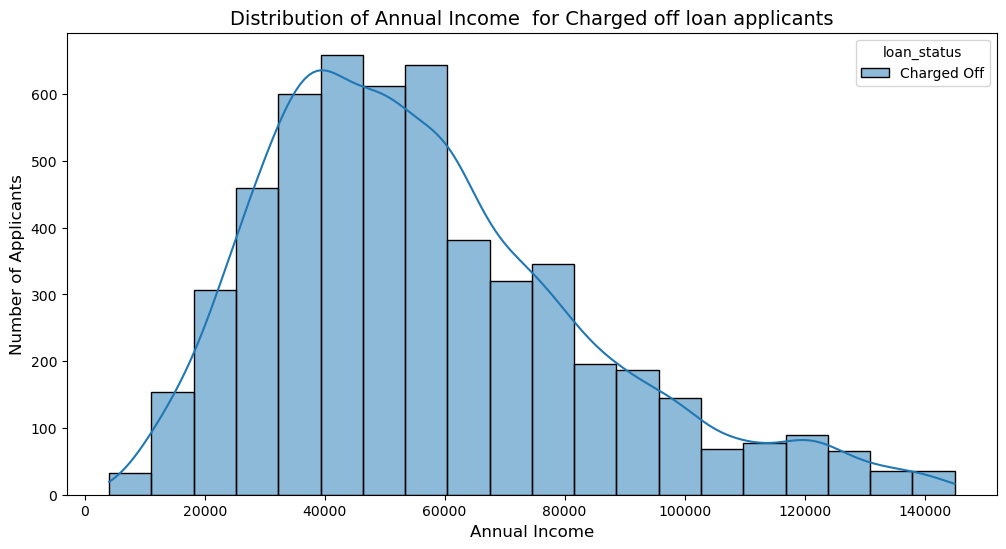

In [154]:
fig, ax = plt.subplots(figsize = (12,6))
sns.histplot(data=df[df.loan_status == 'Charged Off'],x="annual_inc", bins=20,kde=True,hue="loan_status")
plt.title("Distribution of Annual Income  for Charged off loan applicants", fontsize=14)
plt.xlabel("Annual Income", fontsize=12)
plt.ylabel("Number of Applicants", fontsize=12)
plt.show()

__Inferences drawn from Plotted graphs for Annual income,Interest rate,loan amount,DTI,funded amount__

1.most of the charged off loan applicants had annual salaries between 35,000 to 60,000 USD

2.Among loan participants who charged off , a considerable portion belonged to the interest rate bucket of 13%-17% ,9%-13%

3.most of the loan participants who charged off received loan amounts are below  10,000 USD 

4.most of the loan participants who charged off received funded amounts are below  10,000 USD 

5.most of the loan participants who charged off has Dti is between 12-18

# __Bivariate Analysis and Multivariate  Analysis__

Common function for Grouping  and calculating percentage of defaulted loan applicants to the total loan applicants

In [155]:
def calculate_charged_off_percentage(grouping_column):
    df1=df.groupby(grouping_column).agg(
    Total_applicants=("loan_status","count"),
    Charged_off=("loan_status",lambda x:(x=="Charged Off").sum())
    )
    df1["Percentage_Charged_off"]=(df1["Charged_off"]/df1["Total_applicants"])*100
    return df1

In [156]:
df2=calculate_charged_off_percentage("grade")

In [157]:
df2

,Total_applicants,Charged_off,Percentage_Charged_off
grade,,,
A,9684,593,6.123503
B,11151,1380,12.375572
C,7492,1322,17.645489
D,4841,1080,22.309440
E,2449,658,26.868109
F,884,288,32.579186
G,265,94,35.471698


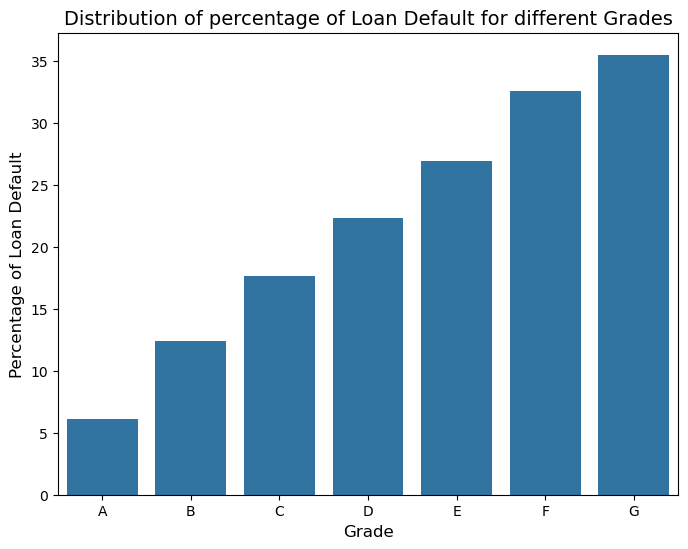

In [158]:
fig, ax = plt.subplots(figsize = (8,6))
sns.barplot(data =df2,x="grade",y="Percentage_Charged_off")
plt.title("Distribution of percentage of Loan Default for different Grades", fontsize=14)
plt.xlabel("Grade", fontsize=12)
plt.ylabel("Percentage of Loan Default", fontsize=12)
plt.show()

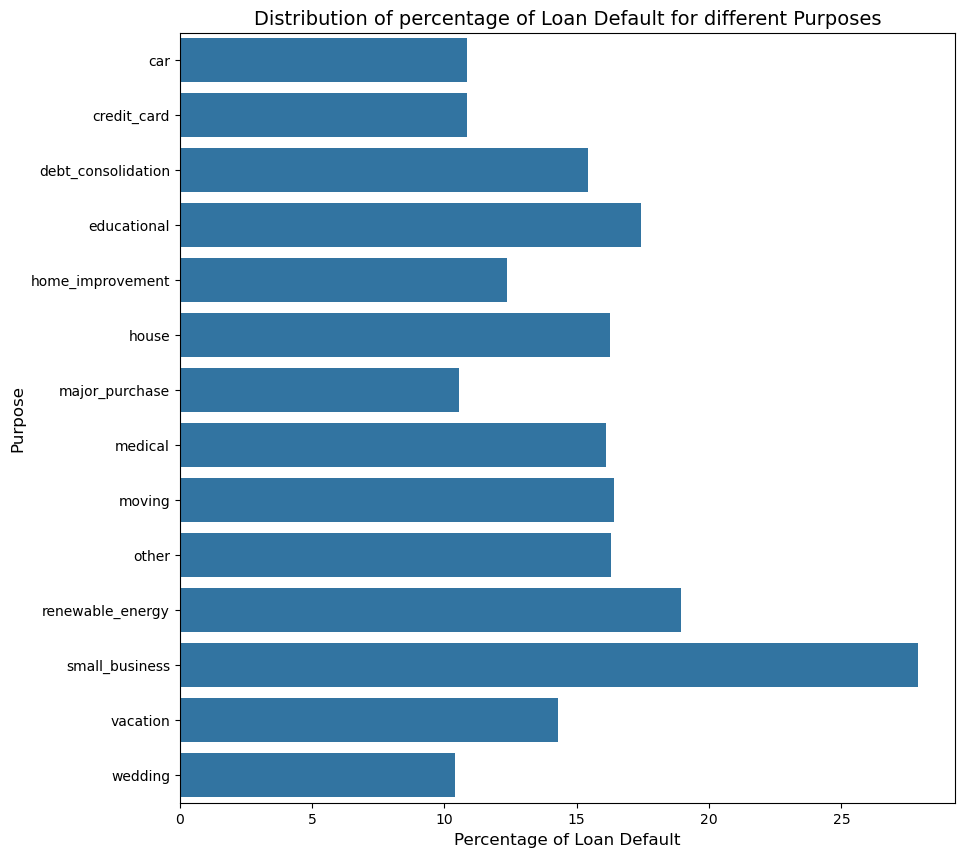

In [159]:
df2=calculate_charged_off_percentage("purpose")
plt.figure(figsize=(10,10))
sns.barplot(data =df2,y="purpose",x="Percentage_Charged_off")
plt.title("Distribution of percentage of Loan Default for different Purposes", fontsize=14)
plt.xlabel("Percentage of Loan Default", fontsize=12)
plt.ylabel("Purpose", fontsize=12)
plt.show()

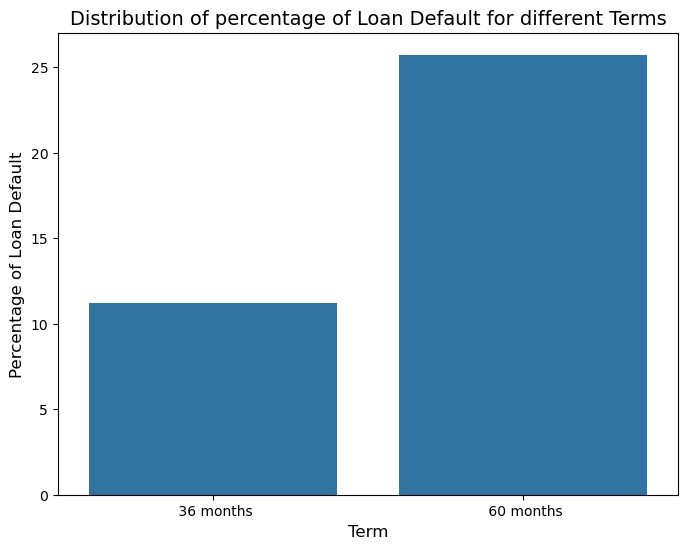

In [160]:
df2=calculate_charged_off_percentage("term")
fig, ax = plt.subplots(figsize = (8,6))
sns.barplot(data =df2,x="term",y="Percentage_Charged_off")
plt.title("Distribution of percentage of Loan Default for different Terms", fontsize=14)
plt.xlabel("Term", fontsize=12)
plt.ylabel("Percentage of Loan Default", fontsize=12)
plt.show()

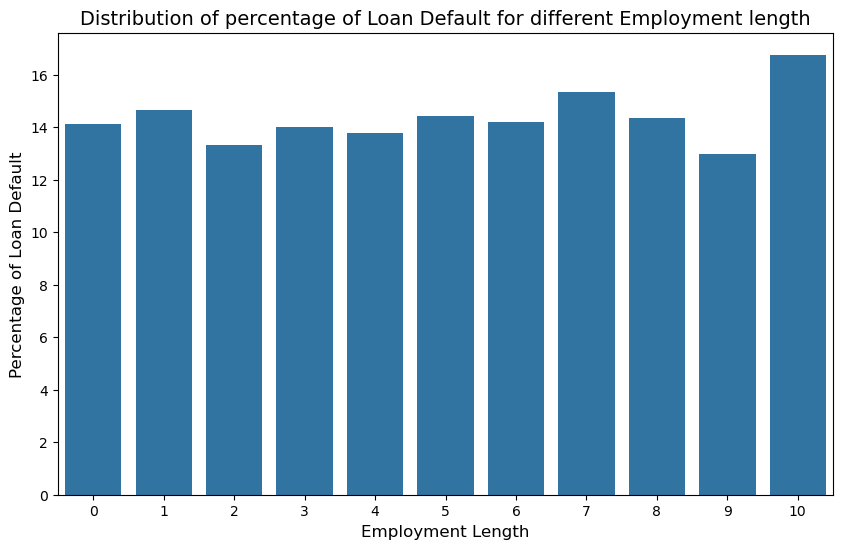

In [161]:
df2=calculate_charged_off_percentage("emp_length")
fig, ax = plt.subplots(figsize = (10,6))
sns.barplot(data =df2,x="emp_length",y="Percentage_Charged_off")
plt.title("Distribution of percentage of Loan Default for different Employment length", fontsize=14)
plt.xlabel("Employment Length", fontsize=12)
plt.ylabel("Percentage of Loan Default", fontsize=12)
plt.show()

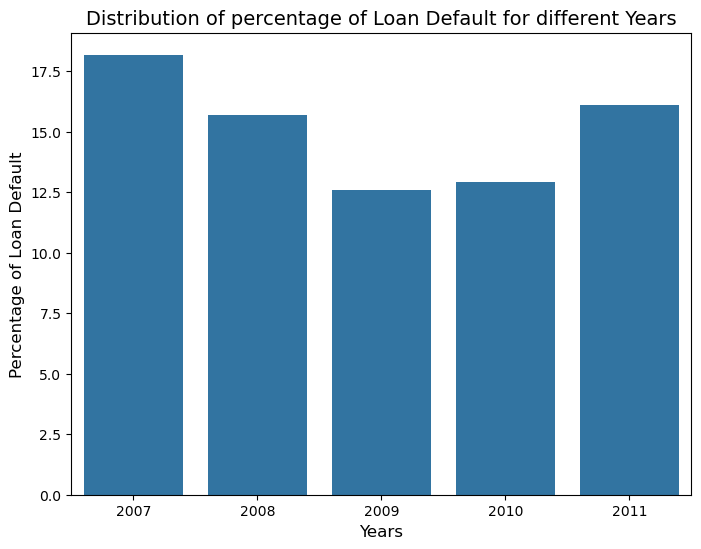

In [162]:
df2=calculate_charged_off_percentage("issue_y")
fig, ax = plt.subplots(figsize = (8,6))
sns.barplot(data =df2,x="issue_y",y="Percentage_Charged_off")
plt.title("Distribution of percentage of Loan Default for different Years", fontsize=14)
plt.xlabel("Years", fontsize=12)
plt.ylabel("Percentage of Loan Default", fontsize=12)
plt.show()

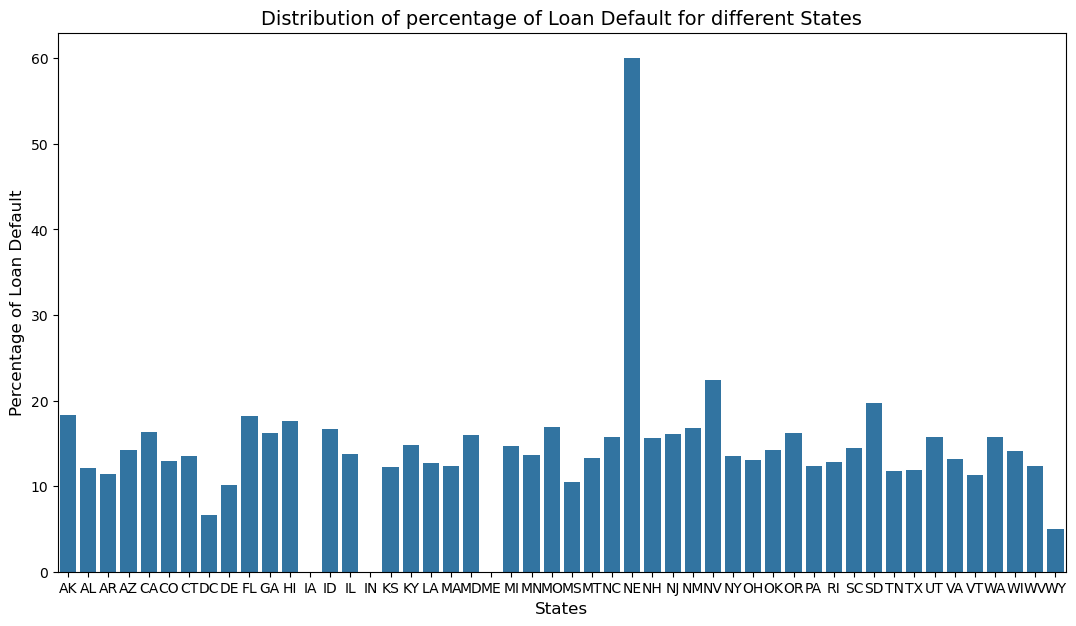

In [163]:
df2=calculate_charged_off_percentage("addr_state")
fig, ax = plt.subplots(figsize=(13,7))
sns.barplot(data =df2,x="addr_state",y="Percentage_Charged_off")
plt.title("Distribution of percentage of Loan Default for different States", fontsize=14)
plt.xlabel("States", fontsize=12)
plt.ylabel("Percentage of Loan Default", fontsize=12)
plt.show()

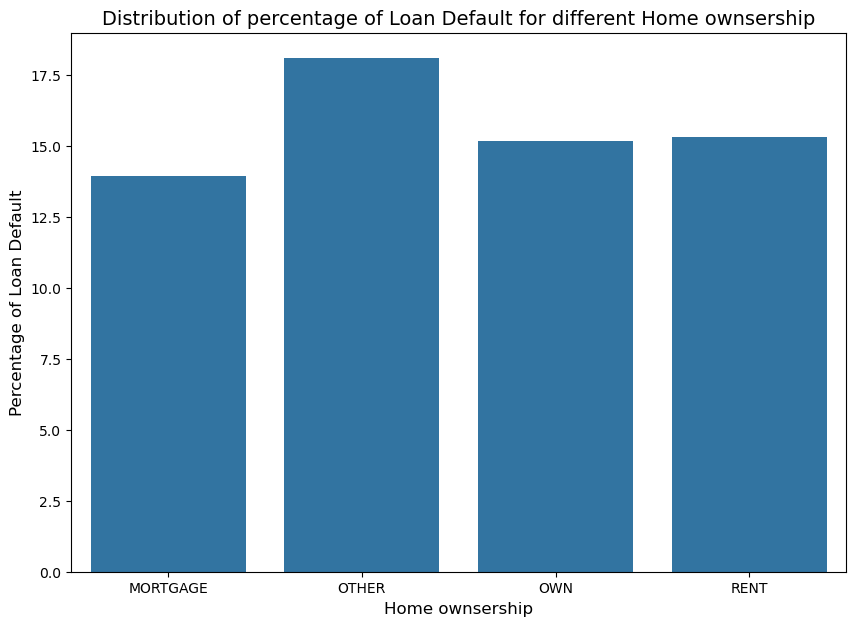

In [164]:
df2=calculate_charged_off_percentage("home_ownership")
fig, ax = plt.subplots(figsize=(10,7))
sns.barplot(data =df2,x="home_ownership",y="Percentage_Charged_off")
plt.title("Distribution of percentage of Loan Default for different Home ownsership", fontsize=14)
plt.xlabel("Home ownsership", fontsize=12)
plt.ylabel("Percentage of Loan Default", fontsize=12)
plt.show()

C:\Users\munishgu\AppData\Local\Temp\ipykernel_27444\1831584960.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1=df.groupby(grouping_column).agg(


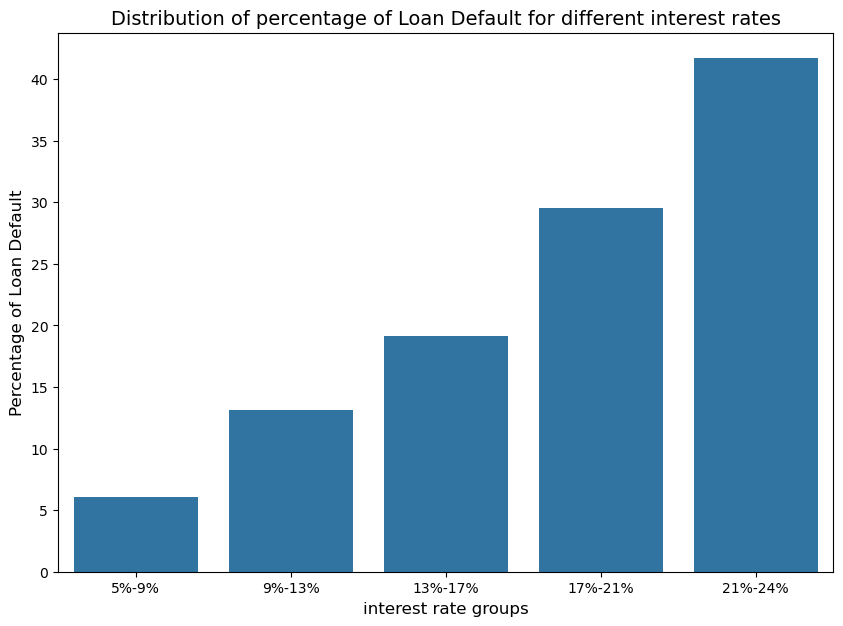

In [165]:

df2=calculate_charged_off_percentage("int_rate_groups")
fig, ax = plt.subplots(figsize=(10,7))
sns.barplot(data =df2,x="int_rate_groups",y="Percentage_Charged_off")
plt.title("Distribution of percentage of Loan Default for different interest rates", fontsize=14)
plt.xlabel("interest rate groups", fontsize=12)
plt.ylabel("Percentage of Loan Default", fontsize=12)
plt.show()

C:\Users\munishgu\AppData\Local\Temp\ipykernel_27444\1831584960.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1=df.groupby(grouping_column).agg(


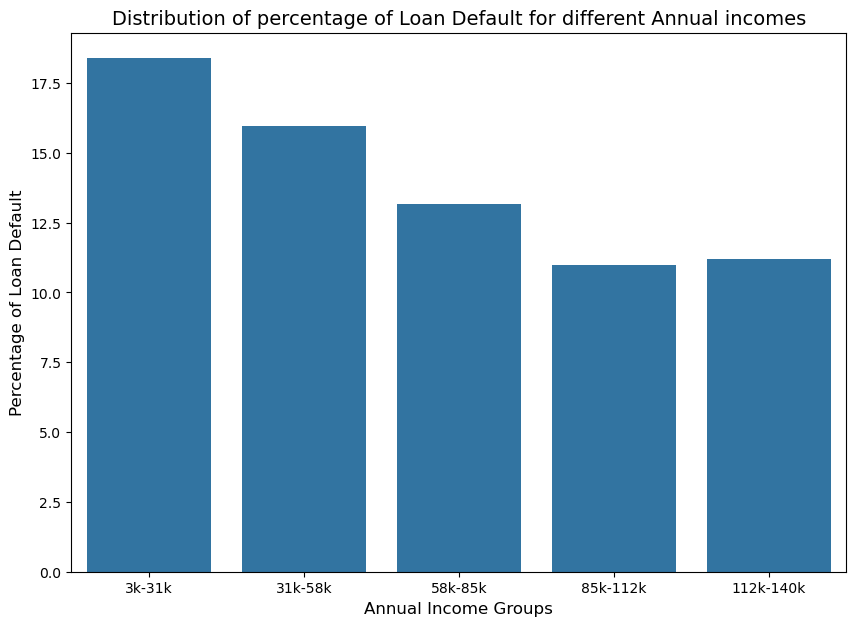

In [166]:
df2=calculate_charged_off_percentage("annual_inc_groups")
fig, ax = plt.subplots(figsize=(10,7))
sns.barplot(data =df2,x="annual_inc_groups",y="Percentage_Charged_off")
plt.title("Distribution of percentage of Loan Default for different Annual incomes", fontsize=14)
plt.xlabel("Annual Income Groups", fontsize=12)
plt.ylabel("Percentage of Loan Default", fontsize=12)
plt.show()

C:\Users\munishgu\AppData\Local\Temp\ipykernel_27444\1831584960.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1=df.groupby(grouping_column).agg(


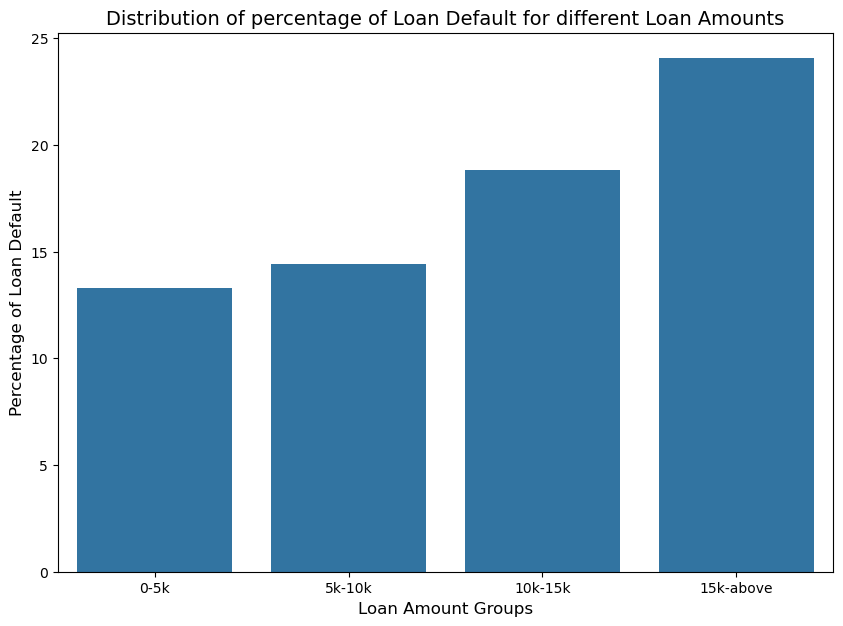

In [167]:
df2=calculate_charged_off_percentage("loan_amnt_groups")
fig, ax = plt.subplots(figsize=(10,7))
sns.barplot(data =df2,x="loan_amnt_groups",y="Percentage_Charged_off")
plt.title("Distribution of percentage of Loan Default for different Loan Amounts", fontsize=14)
plt.xlabel("Loan Amount Groups", fontsize=12)
plt.ylabel("Percentage of Loan Default", fontsize=12)
plt.show()

C:\Users\munishgu\AppData\Local\Temp\ipykernel_27444\1831584960.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1=df.groupby(grouping_column).agg(


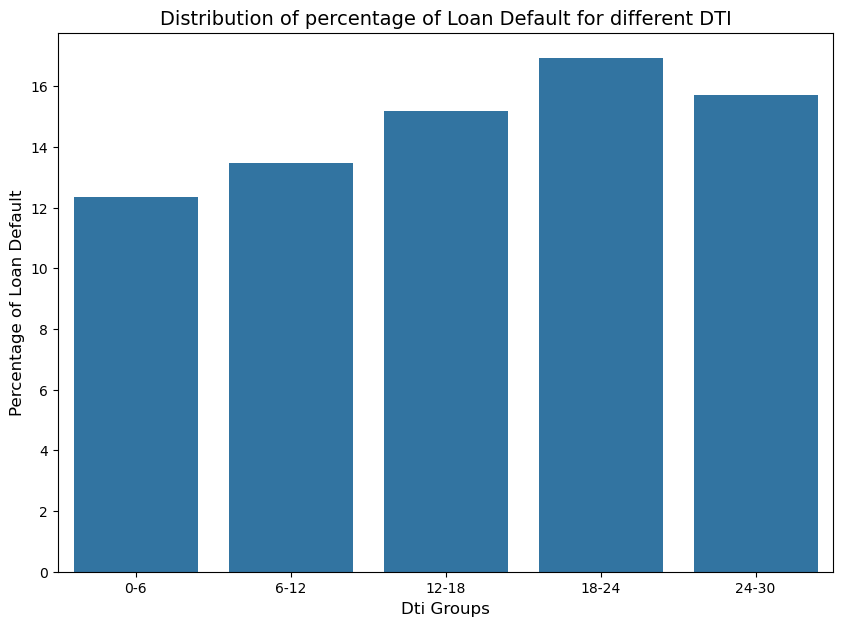

In [168]:
df2=calculate_charged_off_percentage("dti_groups")
fig, ax = plt.subplots(figsize=(10,7))
sns.barplot(data =df2,x="dti_groups",y="Percentage_Charged_off")
plt.title("Distribution of percentage of Loan Default for different DTI", fontsize=14)
plt.xlabel("Dti Groups", fontsize=12)
plt.ylabel("Percentage of Loan Default", fontsize=12)
plt.show()

__Inferences drawn from Plotted graphs of Percentage of Loan Defaults__

1.The Percentage of loan defaults increase with grade ,Grade E,F,G contributes to more percentage of Loan Defaults

2.Small Business is the category where the maximum percentage of loans are defaulted.

3.Loan applicants applying loan for 60 months are likely to default more than the one taking loan for 36 months.

4.Most loan applicants have ten or more years of experience, and they are also the most likely to default.

5.The percentage of loan Defaults is in reducing pattern from 2007 to 2009 and it increased in 2011 drastically.

6.Loan applicants from the state of Nebraska(NE) are most likely to default.

7.Loan applicants who mentioned other as home ownership are more likely to default.

8.The percentage of loan Defaults is in increasing pattern with increase in interest rates,21%-24% range are mostly associated with defaults

9.A majority of the loan applicants who charged off reported an annual income of less than $58,000.

10.A majority of the loan applicants who defaulted received loan amounts of $15,000 or higher.

11.The majority of loan applicants who charged off had significantly high Debt-to-Income (DTI) ratios.

Term vs Loan Status

Grade VS Term

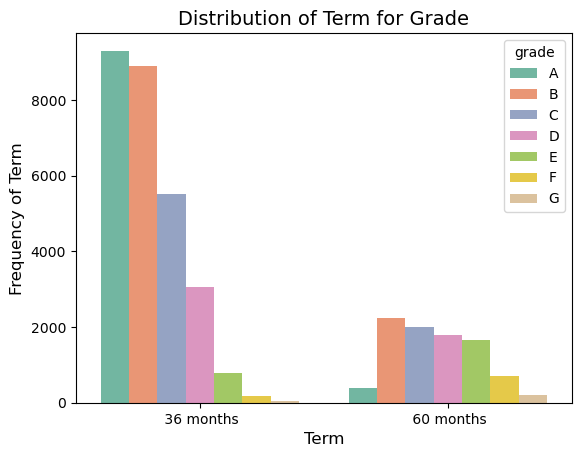

In [169]:
sns.countplot(x = 'term', hue="grade", data = df, hue_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'],palette="Set2")
plt.title("Distribution of Term for Grade", fontsize=14)
plt.xlabel("Term", fontsize=12)
plt.ylabel("Frequency of Term", fontsize=12)
plt.show()

Annual income vs loan purpose

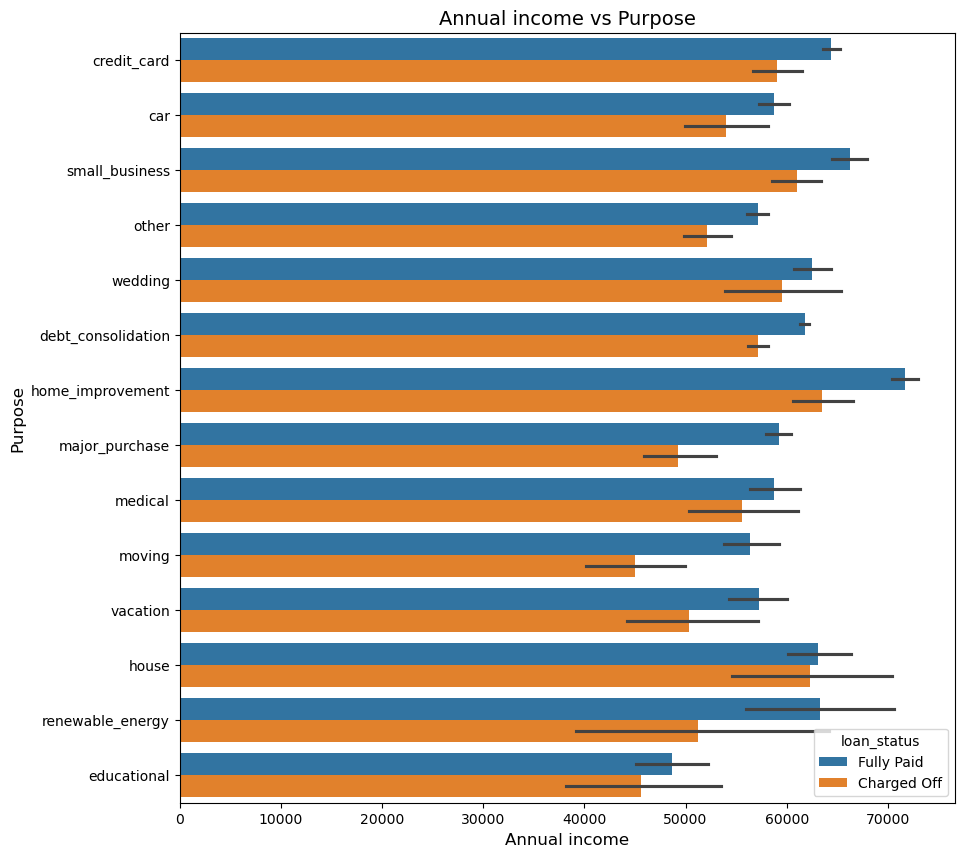

In [170]:
plt.figure(figsize=(10,10))
sns.barplot(data =df,x='annual_inc', y='purpose', hue ='loan_status')
plt.title("Annual income vs Purpose", fontsize=14)
plt.xlabel("Annual income", fontsize=12)
plt.ylabel("Purpose", fontsize=12)
plt.show()

Annual income vs home ownership

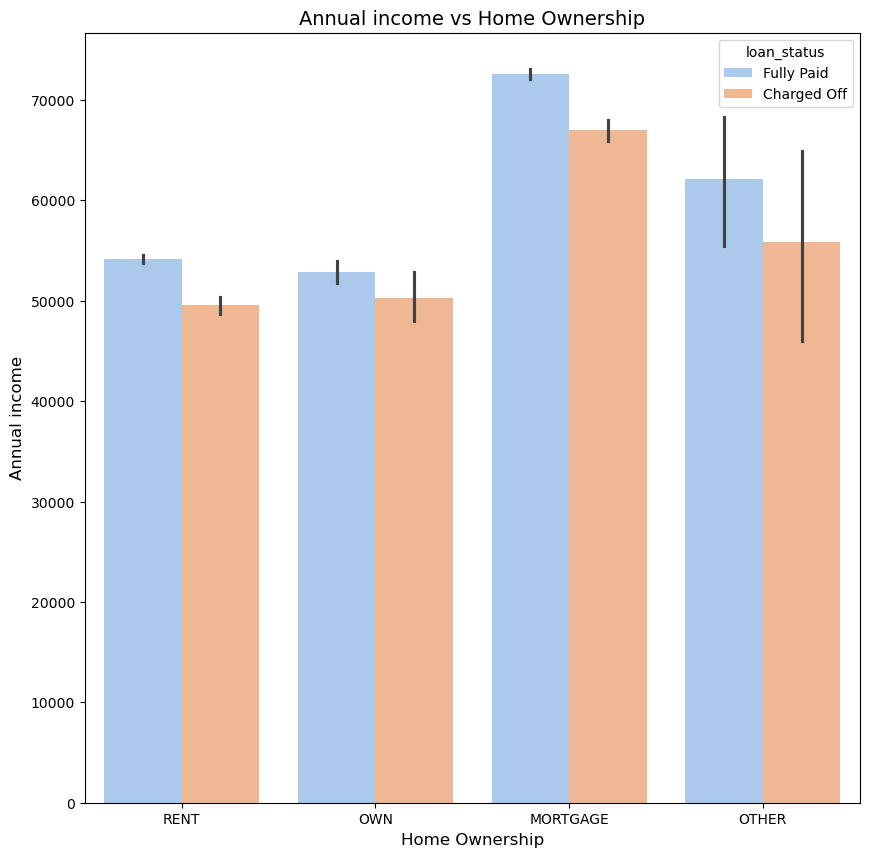

In [171]:
plt.figure(figsize=(10,10))
sns.barplot(data =df,x='home_ownership', y='annual_inc', hue ='loan_status',palette="pastel")
plt.title("Annual income vs Home Ownership", fontsize=14)
plt.xlabel("Home Ownership", fontsize=12)
plt.ylabel("Annual income", fontsize=12)
plt.show()

Annual income vs int_rate

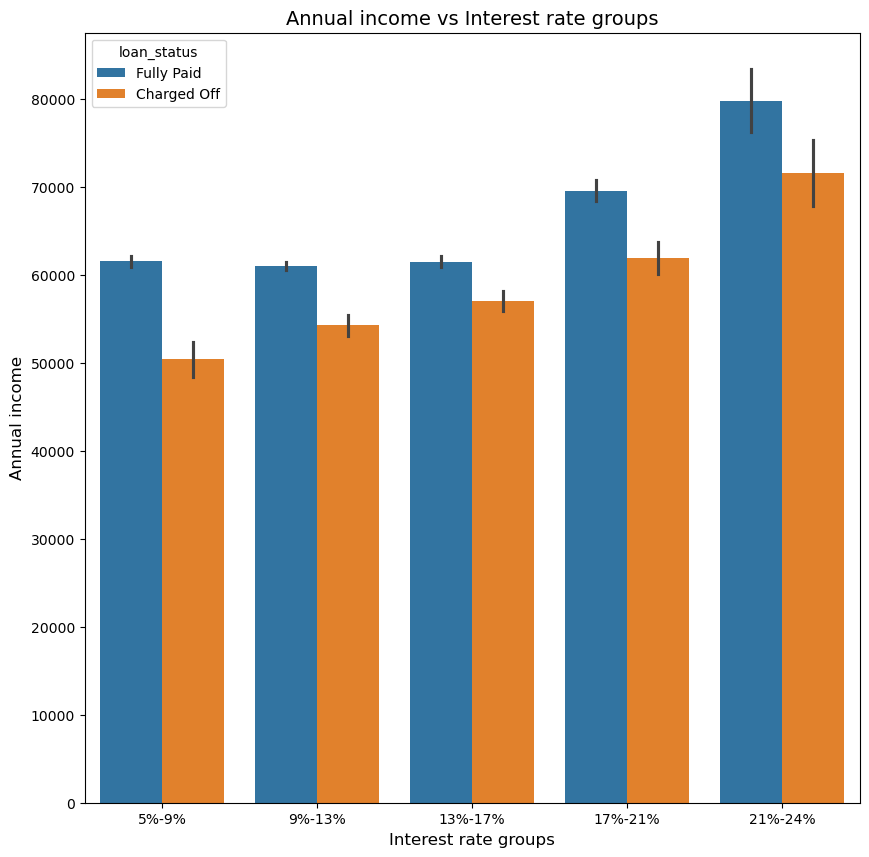

In [172]:
plt.figure(figsize=(10,10))
sns.barplot(data =df,x='int_rate_groups', y='annual_inc', hue ='loan_status')
plt.title("Annual income vs Interest rate groups", fontsize=14)
plt.xlabel("Interest rate groups", fontsize=12)
plt.ylabel("Annual income", fontsize=12)
plt.show()

Loan Amount vs Interest Rate

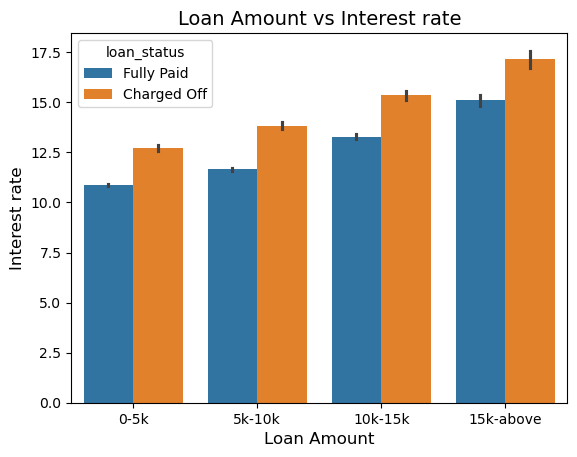

In [173]:
sns.barplot(data =df,x='loan_amnt_groups', y='int_rate', hue ='loan_status')
plt.title("Loan Amount vs Interest rate", fontsize=14)
plt.xlabel("Loan Amount", fontsize=12)
plt.ylabel("Interest rate", fontsize=12)
plt.show()

Loan vs Loan purpose

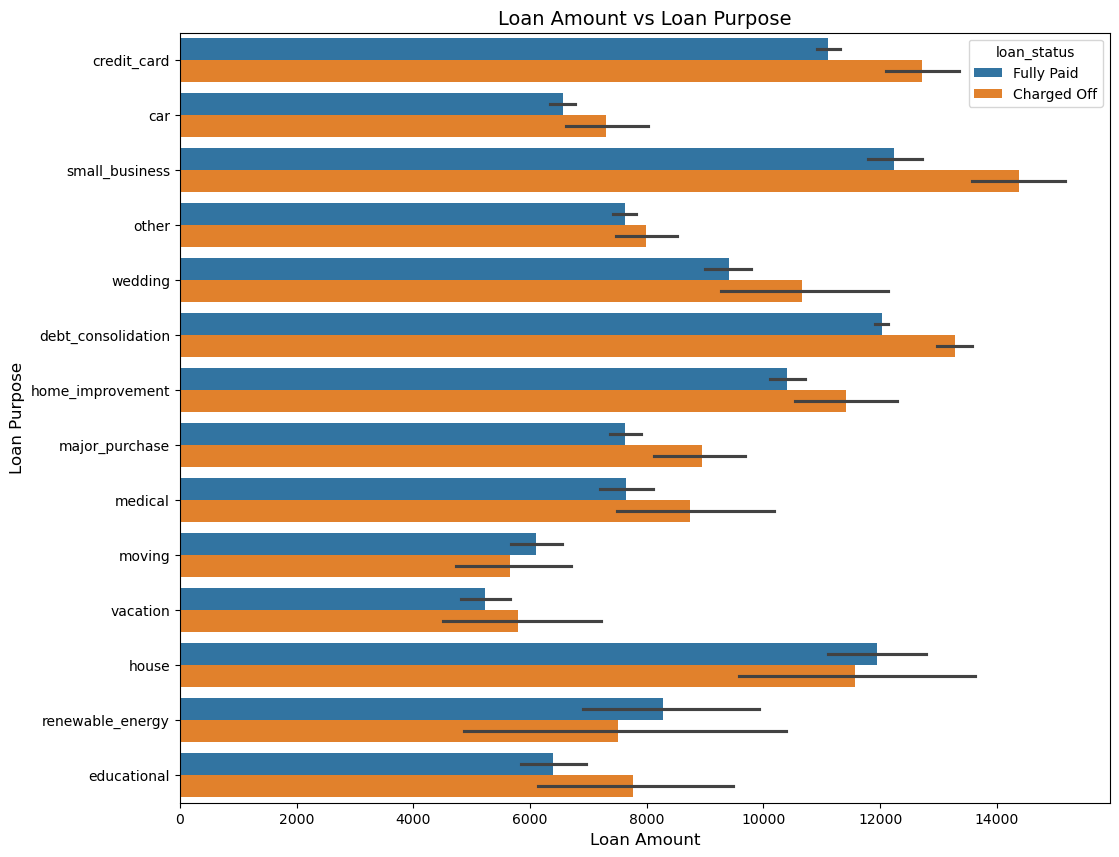

In [174]:
plt.figure(figsize=(12,10))
sns.barplot(data =df,x='loan_amnt', y='purpose', hue ='loan_status')
plt.title("Loan Amount vs Loan Purpose", fontsize=14)
plt.xlabel("Loan Amount", fontsize=12)
plt.ylabel("Loan Purpose", fontsize=12)
plt.show()

Loan vs House Ownership

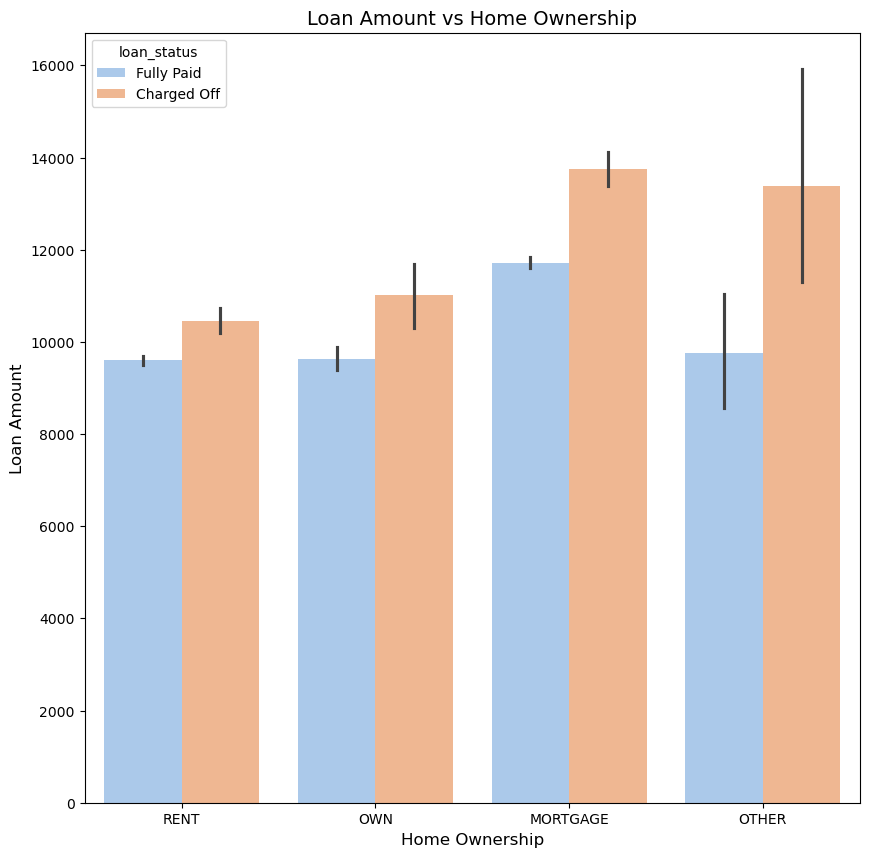

In [175]:
plt.figure(figsize=(10,10))
sns.barplot(data =df,x='home_ownership', y='loan_amnt', hue ='loan_status',palette="pastel")
plt.title("Loan Amount vs Home Ownership", fontsize=14)
plt.xlabel("Home Ownership", fontsize=12)
plt.ylabel("Loan Amount", fontsize=12)
plt.show()

Loan amount vs month issued and year issued

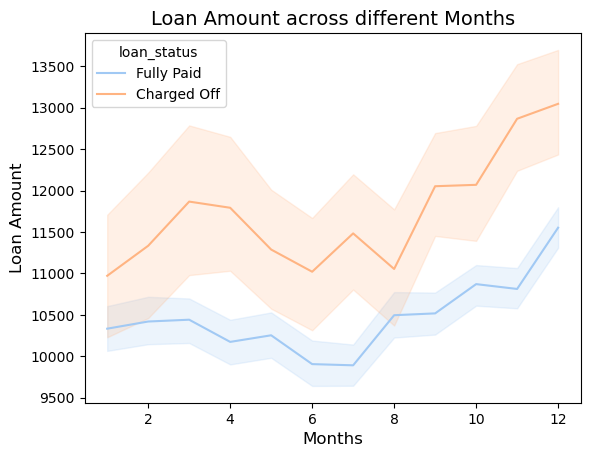

In [176]:
sns.lineplot(data =df,y='loan_amnt', x='issue_m', hue ='loan_status',palette="pastel")
plt.title("Loan Amount across different Months", fontsize=14)
plt.xlabel("Months", fontsize=12)
plt.ylabel("Loan Amount", fontsize=12)
plt.show()

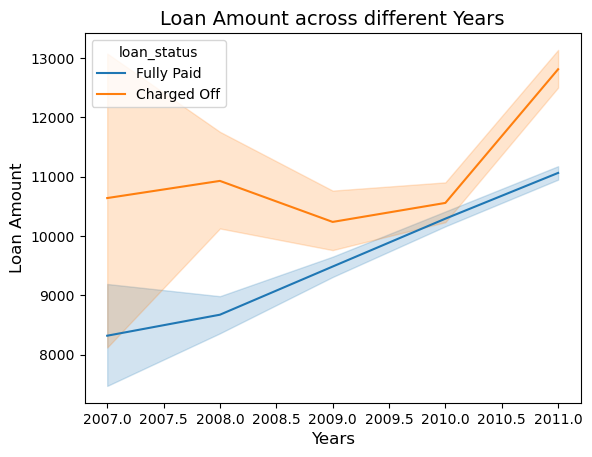

In [177]:
sns.lineplot(data =df,y='loan_amnt', x='issue_y', hue ='loan_status')
plt.title("Loan Amount across different Years", fontsize=14)
plt.xlabel("Years", fontsize=12)
plt.ylabel("Loan Amount", fontsize=12)
plt.show()

Loan amount vs Grade

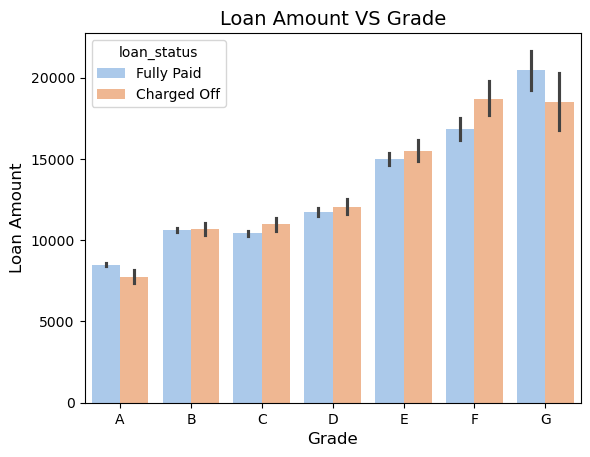

In [178]:
sns.barplot(data =df,x='grade', y='loan_amnt', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.title("Loan Amount VS Grade", fontsize=14)
plt.xlabel("Grade", fontsize=12)
plt.ylabel("Loan Amount", fontsize=12)
plt.show()

Text(0, 0.5, 'Loan Amount')

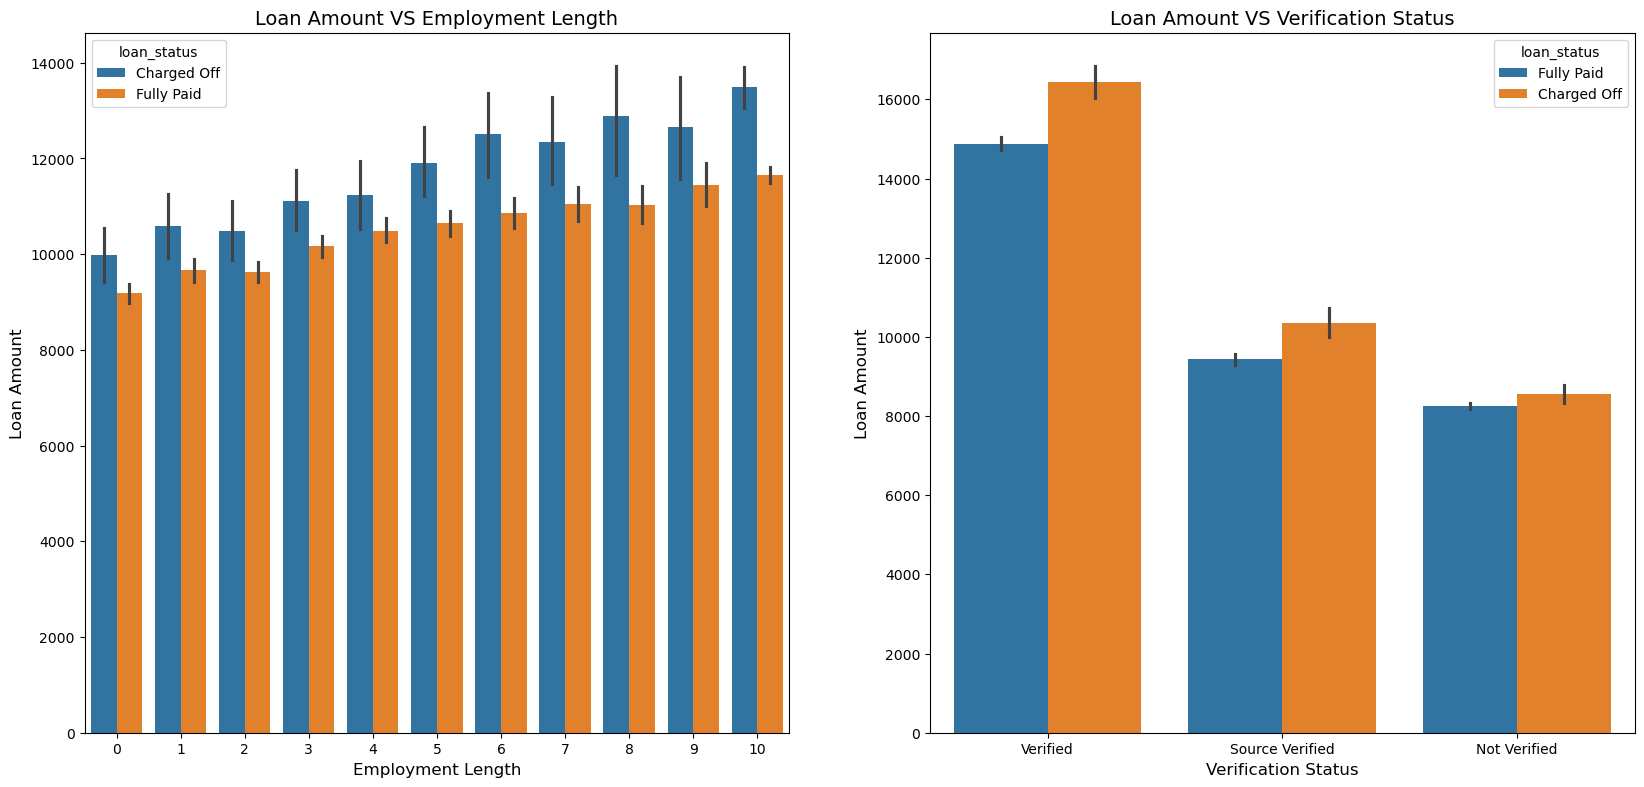

In [179]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.barplot(data =df,y='loan_amnt', x='emp_length', hue ='loan_status')
plt.title("Loan Amount VS Employment Length", fontsize=14)
plt.xlabel("Employment Length", fontsize=12)
plt.ylabel("Loan Amount", fontsize=12)
plt.subplot(222)
sns.barplot(data =df,y='loan_amnt', x='verification_status', hue ='loan_status')
plt.title("Loan Amount VS Verification Status", fontsize=14)
plt.xlabel("Verification Status", fontsize=12)
plt.ylabel("Loan Amount", fontsize=12)

grade vs interest rate

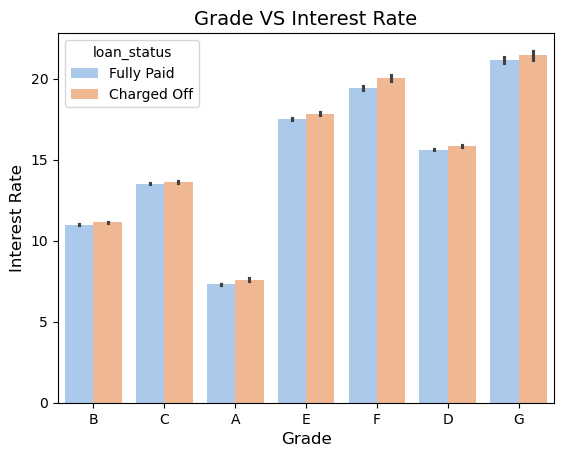

In [180]:
sns.barplot(data =df,x='grade', y='int_rate', hue ='loan_status',palette="pastel")
plt.title("Grade VS Interest Rate", fontsize=14)
plt.xlabel("Grade", fontsize=12)
plt.ylabel("Interest Rate", fontsize=12)
plt.show()

__Inferences drawn from above Plotted graphs__

Applicants taking loan for 'home improvement' and have income of 60k -70k

Applicants whose home ownership is 'MORTGAGE and have income of 60-70k

Applicants who receive interest at the rate of 21-24% and have an income of 70k-80k

Applicants who have taken a loan in the range 15k -above and are charged interest rate of 15-17.5 %

Applicants who have taken a loan for small business and the loan amount is greater than 14k

Applicants whose home ownership is 'MORTGAGE and have loan of 14-16k

When grade is F,G and loan amount is between 15k-20k

When employment length is 10yrs and loan amount is 12k-14k

When the loan is verified and loan amount is above 16
k
For grade G and interest rate above 20%

# ** Recommendations **


1.	Loan applicants applying loan for 60 months are likely to default more than the one taking loan for 36 months.
2.	Applicants who had been employed for more than 10 years accounted for the highest number of "Charged off" loans. This indicates that long-term employment history did not necessarily guarantee successful loan repayment.
3.	The majority of "Charged off" loan participants lived in rented houses or mortgage.
4.	Most of the charged off loan applicants had annual salaries between 35,000 to 60,000 USD
5.	Applicants taking loan for 'home improvement' and have income of 60k -70k likely to default
6.	Applicants whose home ownership is 'MORTGAGE and have income of 60-70k likely to default
7.	Applicants who receive interest at the rate of 21-24% and have an income of 70k-80k are likely default
8.	When grade is F,G and loan amount is between 15k-20k likely to default
9.	When the loan is verified and loan amount is above 16K likely to default
10.	For grade G and interest rate above 20% likely to default
11.	Loan applicants from the state of Nebraska(NE) have high percentage of default.
12.	Borrowers from states CA, FL, NJ have maximum number of loan defaults
13.	Most of the loan participants who charged off has Dti is between 13-17
14.	Small Business is the category where the maximum percentage of loans are defaulted.
15.	A majority of the loan applicants who charged off reported an annual income of less than $58,000.
16.	The percentage of loan Defaults is in increasing pattern with increase in interest rates,21%-24% range are mostly associated with defaults.
17.	Majority of the loan applicants who defaulted received loan amounts of $15,000 or higher.
18.	The Percentage of loan defaults increase with grade , Grade E,F,G contributes to more percentage of Loan Defaults.
